# **Twitter Sentiment Analysis**

# **Table Of Contents**

**1. Introduction and Data Preprocessing**
   - Project Overview
   - Data Collection
   - Data Cleaning and Preprocessing
     - Removing Special Characters and Punctuation
     - Tokenization
     - Handling Lower/Upper Case
     - Stop Word Removal
     - Handling Emojis and Symbols
     - Handling Abbreviations and Slang
     - Removing Duplicates
     - Handling Missing Values
     - Balancing the Dataset (if required)

**2. Data Inspection and Exploration**
   - Exploratory Data Analysis (EDA)
     - Distribution of Tweet Length
     - Class Distribution (Hate Speech vs. Non-Hate Speech)
     - Most Frequent Words (Word Cloud)
     - Analyzing Hashtags and Mentions

**3. Feature Engineering**
   - Introduction to Feature Extraction
   - Bag-of-Words (BoW)
     - Creating the BoW Model
     - Generating BoW Features
   - TF-IDF (Term Frequency-Inverse Document Frequency)
     - Creating the TF-IDF Model
     - Generating TF-IDF Features
   - Word Embeddings
     - Word2Vec or GloVe (if applicable)

**4. Model Building and Sentiment Analysis**
   - Introduction to Sentiment Analysis
   - Data Splitting (Train-Validation-Test Split)
   - Model Selection Criteria (Accuracy, Precision, Recall, F1-Score)
   - Building Sentiment Analysis Models:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Random Forest
     - XGBoost

**5. Model Fine-tuning and Evaluation**
   - Hyperparameter Tuning for Each Model
   - Cross-Validation and Grid Search
   - Model Evaluation
   - Confusion Matrix Analysis
   - Model Comparison
   - Feature Importance (if applicable)

**6. Summary and Conclusion**
   - Recap of Project Objectives
   - Key Findings and Insights
   - Model Selection and Performance
   - Future Work and Recommendations
   - Conclusion and Final Thoughts

# Introduction and Data Preprocessing

**Project Title: Twitter Sentiment Analysis for Hate Speech Detection**

**Problem Statement:**

In the age of social media, Twitter has become a prominent platform for users to express their thoughts, opinions, and emotions. Unfortunately, this freedom of expression can sometimes be misused, leading to the proliferation of hate speech, racism, and sexism in the digital space. The ability to automatically detect and classify such harmful content is crucial to maintaining a safe and inclusive online environment.

The objective of this project is to develop a machine learning model for Twitter sentiment analysis with a focus on detecting hate speech. Specifically, we aim to classify tweets into two categories: those containing racist or sexist sentiments and those that do not. By doing so, we hope to contribute to a safer and more respectful online community while reducing the harmful impact of hate speech.

**Project Description:**

**Background:**
Hate speech on social media platforms is a significant issue that not only affects individuals but also has broader social implications. Twitter, being one of the most popular platforms for sharing thoughts and ideas, is not immune to this problem. Hate speech in tweets can lead to cyberbullying, harassment, and the spread of harmful ideologies, creating a hostile digital environment. To address this issue, we propose a Twitter Sentiment Analysis project with a focus on hate speech detection.

**Objectives:**
The primary objectives of this project are as follows:

1. Develop a robust machine learning model that can accurately classify tweets into two categories: those containing racist or sexist sentiments and those that do not.

2. Preprocess and clean the Twitter data, handling challenges such as slang, emojis, and noisy text to improve the model's performance.

3. Implement natural language processing (NLP) techniques to extract relevant features from tweets, such as keywords, context, and sentiment.

4. Explore and select appropriate algorithms and techniques for text classification, considering factors like deep learning, traditional machine learning, and ensemble methods.

5. Train the model on a diverse dataset of tweets that includes examples of hate speech and non-hate speech to ensure generalization and robust performance.

6. Evaluate the model using appropriate metrics, such as accuracy, precision, recall, and F1-score, to measure its effectiveness in detecting hate speech.

7. Implement the model in a real-time or batch processing pipeline to continuously monitor and classify tweets, helping Twitter and its users identify and address hate speech.

8. Provide interpretability tools to help understand how and why the model classifies tweets as hate speech, allowing for transparency and potential model improvements.

**Expected Impact:**
The successful completion of this project will have a positive impact on Twitter and its user community in several ways:

1. Enhanced Safety: By automatically identifying and flagging hate speech, Twitter can take appropriate actions, including content moderation and user warnings, to maintain a safer environment.

2. Improved User Experience: Users will experience a reduction in exposure to offensive content, making their interactions on Twitter more positive and enjoyable.

3. Facilitation of Content Moderation: Twitter's content moderation teams can benefit from the automated classification of tweets, allowing them to prioritize and respond to reported hate speech more efficiently.

4. Compliance with Regulations: In some regions, there are legal requirements to combat hate speech. This project can assist Twitter in fulfilling its legal responsibilities.

Overall, the Twitter Sentiment Analysis for Hate Speech Detection project aims to harness the power of machine learning and NLP to mitigate the negative effects of hate speech on Twitter and promote a more inclusive and respectful online community.

## Importing Libraries

In [32]:
import re # regular expression
import pandas as pd
pd.set_option('display.max_colwidth', 100) # to extend the column width
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
warnings.filterwarnings("ignore", category=DeprecationWarning)


## Reading Datasets

In [2]:
train_data=pd.read_csv('Data/train_data.csv')
test_data=pd.read_csv('Data/test_data.csv')
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [3]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs ...
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ð..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


## Data Inspection

* Looking non hate speeh

In [4]:
train_data[train_data['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #ha...
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


* Checking some Hate Speech

In [5]:
train_data[train_data['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedol...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xen...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting o...
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #p...


In [6]:
train_data.shape

(31962, 3)

In [7]:
test_data.shape

(17197, 2)

Train set has 31,962 tweets and test set has 17,197 tweets.

In [8]:
train_data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

**Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.**

In [9]:
plt.style.use('dark_background')

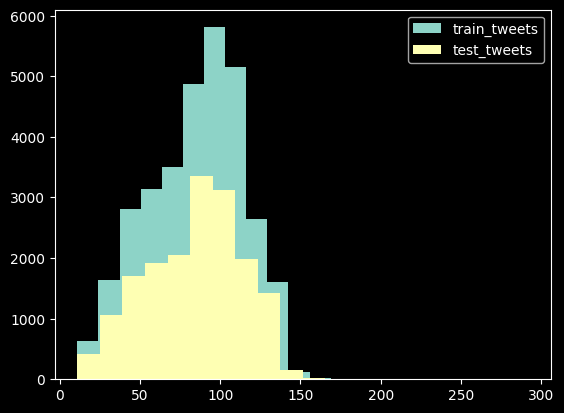

In [10]:
length_train = train_data['tweet'].str.len()
length_test = test_data['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

The tweet-length distribution is more or less the same in both train and test data.

## Data Cleaning

In [11]:
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)

In [12]:
full_data=train_data._append(test_data,ignore_index=True)
full_data.shape

(49159, 3)

In [13]:
full_data

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never on..."
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work ..."


* Removing unwanted text from tweet

In [14]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [15]:
full_data['tidy_tweet'] = np.vectorize(remove_pattern)(full_data['tweet'], "@[\w]*")

In [16]:
full_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapoi...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


* Removing Special Chracter

In [17]:
full_data['tidy_tweet'] = full_data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [18]:
full_data.head(11)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapoi...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #ha...,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #ha...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


* Removing Sort words

In [19]:
full_data['tidy_tweet'] = full_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
full_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


#### Text Normalization

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [21]:
tokenize_tweet=full_data['tidy_tweet'].apply(lambda x: x.split())
tokenize_tweet.head()

0                          [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, ...
2                                                                                [bihday, your, majesty]
3                             [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                    [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [22]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenize_tweet = tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenize_tweet

0                                     [when, father, dysfunct, selfish, drag, kid, into, dysfunction., #run]
1        [thank, #lyft, credit, can't, caus, they, don't, offer, wheelchair, van, pdx., #disapoint, #gett...
2                                                                                    [bihday, your, majesti]
3                                 [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, societi, #motiv]
                                                        ...                                                 
49154    [thought, factory:, left-right, polarisation!, #trump, #uselections2016, #leadership, #polit, #b...
49155            [feel, like, mermaid, ð, #hairflip, #neverreadi, #formal, #wed, #gown, #dress, #mermaid]
49156    [#hillari, #campaign, today, #ohio((omg)), &amp;, use, word, like, "assets&amp;liability", never...
49157          [hap

Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

In [23]:
for i in range(len(tokenize_tweet)):
    tokenize_tweet[i] = ' '.join(tokenize_tweet[i])
    

full_data['tidy_tweet'] = tokenize_tweet
full_data['tidy_tweet']

0                                               when father dysfunct selfish drag kid into dysfunction. #run
1                    thank #lyft credit can't caus they don't offer wheelchair van pdx. #disapoint #getthank
2                                                                                        bihday your majesti
3                                          #model love take with time urð±!!! ðððð ð¦ð¦ð¦
4                                                                                 factsguide: societi #motiv
                                                        ...                                                 
49154    thought factory: left-right polarisation! #trump #uselections2016 #leadership #polit #brexit #bl...
49155                        feel like mermaid ð #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156    #hillari #campaign today #ohio((omg)) &amp; use word like "assets&amp;liability" never onc #clin...
49157              

### Creating  WordCloud for visualize common word used in tweet

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

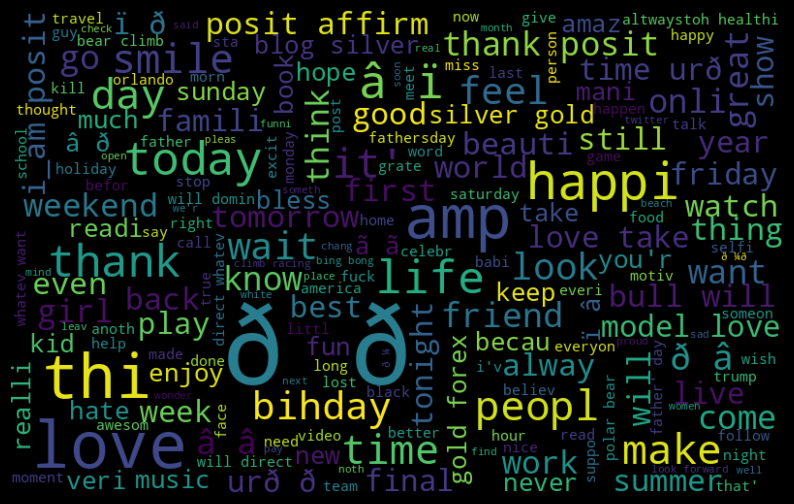

In [24]:
all_words = ' '.join([text for text in full_data['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones.

### let's visualize common positive words

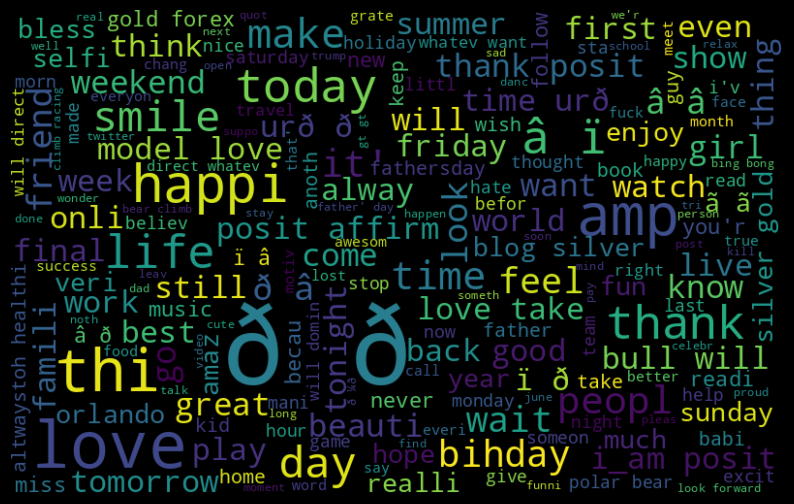

In [25]:
pos_words=' '.join([text for text in full_data['tidy_tweet'][full_data['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

### Now turn for negative word..

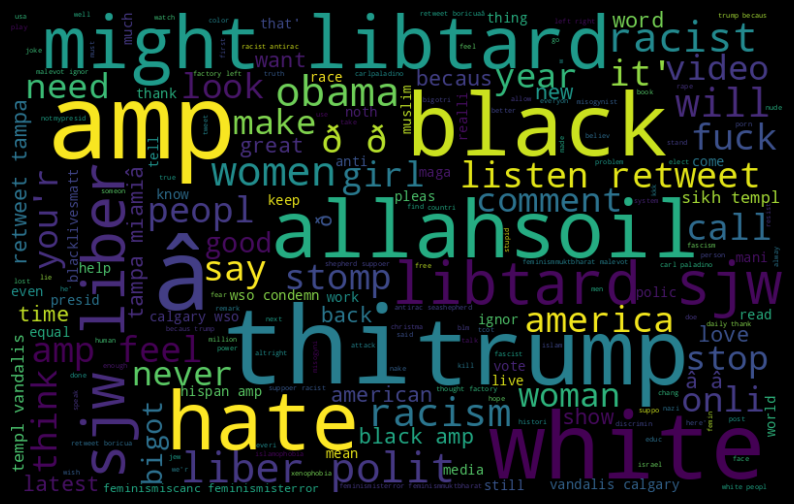

In [26]:
negative_words=' '.join([text for text in full_data['tidy_tweet'][full_data['label']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

### Effect of `Hasgtags` On tweets sentiment

In [27]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    return hashtags


In [28]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(full_data['tidy_tweet'][full_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(full_data['tidy_tweet'][full_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
HT_regular


['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 '80day',
 'gettingf',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro2016',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1989',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop'

In [29]:
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'medâ',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'â',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflictâ',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'b

### Ploting Positive Hashtag

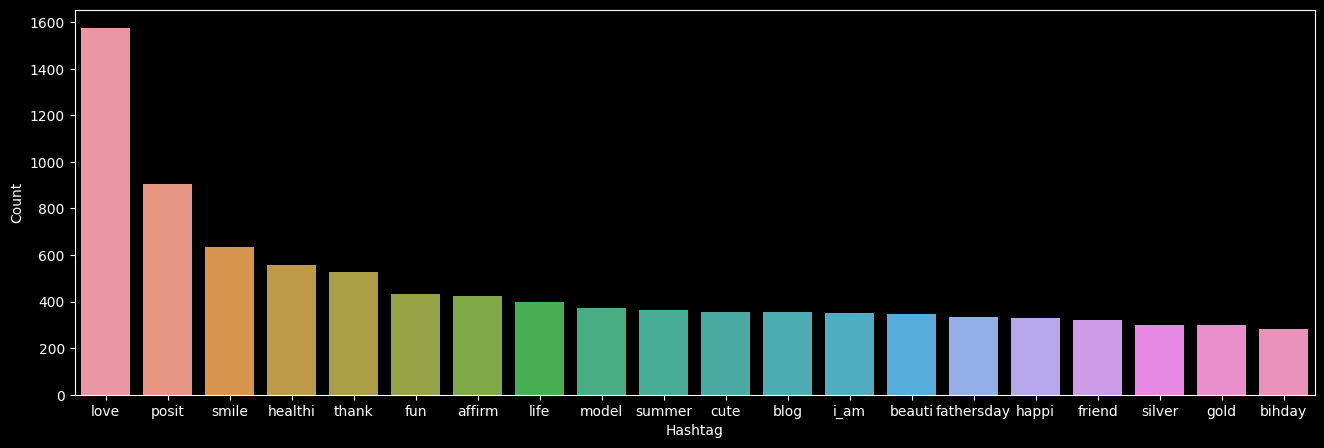

In [30]:
import warnings
warnings.filterwarnings("ignore")
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                 'Count': list(a.values())})

#selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

#### Negative Hasgtags

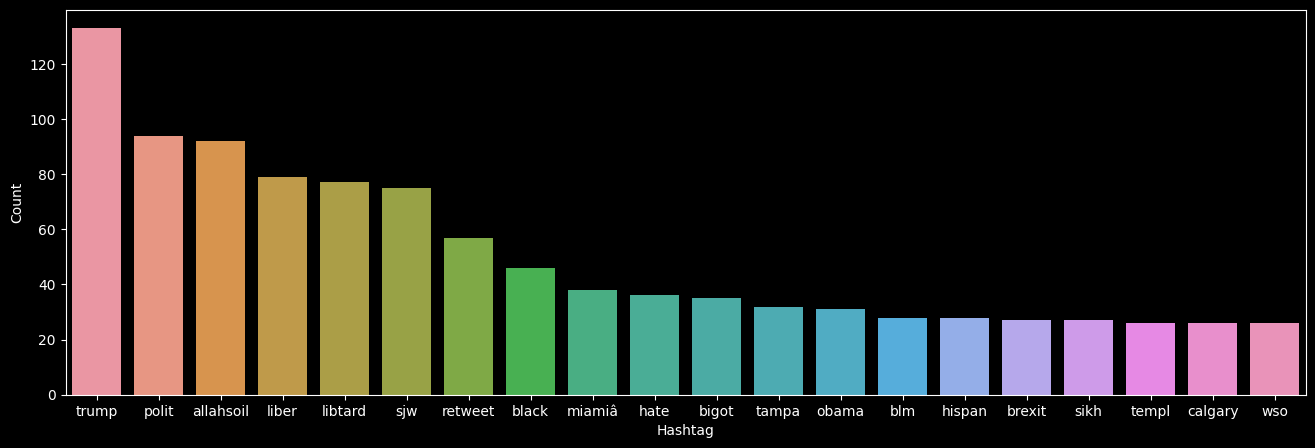

In [31]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

#Selecting top 20 most frequent tweets
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

### Extractig Features From cleaned Tweets

In [33]:
train_data['tweet'].head(11)

0      @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1     @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.  ...
2                                                                                     bihday your majesty
3                  #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4                                                                  factsguide: society now    #motivation
5     [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...
6                               @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7     the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #ha...
8                 we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦ 
9                                             

## Bag-of-Words Features

In [34]:
bw_vectorizer=CountVectorizer(max_df=0.90,min_df=2,
                              max_features=1000, stop_words='english')
bw=bw_vectorizer.fit_transform(full_data['tidy_tweet'])
bw.shape

(49159, 1000)

In [36]:
print(bw)

  (0, 293)	1
  (0, 455)	1
  (0, 726)	1
  (1, 860)	1
  (1, 134)	1
  (1, 235)	1
  (1, 591)	1
  (2, 84)	1
  (3, 550)	1
  (3, 512)	1
  (3, 870)	1
  (3, 910)	1
  (4, 560)	1
  (5, 418)	1
  (5, 842)	1
  (5, 76)	1
  (6, 126)	1
  (6, 876)	1
  (7, 735)	2
  (7, 978)	2
  (7, 865)	1
  (7, 386)	1
  (7, 427)	1
  (7, 344)	1
  (8, 512)	1
  :	:
  (49155, 489)	1
  (49155, 298)	1
  (49155, 944)	1
  (49155, 240)	1
  (49156, 873)	1
  (49156, 597)	1
  (49156, 36)	2
  (49156, 489)	1
  (49156, 598)	1
  (49156, 965)	2
  (49156, 913)	1
  (49156, 127)	1
  (49156, 404)	1
  (49157, 966)	2
  (49157, 172)	1
  (49157, 716)	1
  (49157, 547)	2
  (49157, 472)	1
  (49157, 192)	1
  (49157, 221)	1
  (49157, 603)	1
  (49157, 383)	1
  (49158, 324)	1
  (49158, 785)	1
  (49158, 346)	1


## TF-IDF Features

In [37]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=0.0,
                                 max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(full_data['tidy_tweet'])

tfidf.shape


(49159, 1000)

In [38]:
print(tfidf)

  (0, 728)	0.6534353266467646
  (0, 457)	0.5935074978308946
  (0, 295)	0.46986287777238456
  (1, 593)	0.6230178146999178
  (1, 237)	0.40468418164335584
  (1, 135)	0.5641913212158083
  (1, 862)	0.3602327980056053
  (2, 85)	1.0
  (3, 911)	0.5886070402978535
  (3, 872)	0.4520606470673329
  (3, 514)	0.3573846230820008
  (3, 552)	0.5669736807554666
  (4, 562)	1.0
  (5, 77)	0.5272778943589644
  (5, 844)	0.5357057173231109
  (5, 420)	0.6595433318196068
  (6, 878)	0.5867271555150375
  (6, 127)	0.8097846905080591
  (7, 346)	0.25206067568248486
  (7, 429)	0.386759838799602
  (7, 388)	0.29029849651118456
  (7, 867)	0.26163513986121484
  (7, 979)	0.5195414562982132
  (7, 737)	0.603516987803057
  (8, 467)	0.7268472171853657
  :	:
  (49155, 242)	0.6322864130459652
  (49155, 945)	0.5318256874656928
  (49155, 300)	0.41316310386508587
  (49155, 491)	0.3829772573321795
  (49156, 406)	0.3317454686306731
  (49156, 128)	0.3286030057239886
  (49156, 914)	0.26044477009959016
  (49156, 966)	0.5573202050042144

## Word Embeddings

### 1. Word2Vec Embeddings

In [40]:
tokenize_tweet=full_data['tidy_tweet'].apply(lambda x: x.split())


model_w2v=gensim.models.Word2Vec(tokenize_tweet,window=5,
                                 min_count=2,sg=1,hs=0,
                                 negative=10,workers=2,
                                 seed=34)

model_w2v.train(tokenize_tweet,total_examples=len(full_data['tidy_tweet']),
                                                  epochs=21)

(7040689, 8593347)

**Let's test the model Word2Vec**

In [41]:
model_w2v.wv.most_similar(positive='good')

[('bong', 0.5650331974029541),
 ('#katiecouric...', 0.5404777526855469),
 ('#morning,', 0.536712646484375),
 ('forgivers.', 0.5341042876243591),
 ('#halthy,', 0.5319845676422119),
 ('[06.11.16]', 0.5280519127845764),
 ('#grassrootsmus', 0.5267196893692017),
 ('honey.', 0.5235346555709839),
 ('quillen', 0.5211611986160278),
 ('peeps!', 0.5202098488807678)]

In [42]:
model_w2v.wv.most_similar(positive='love')

[('ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦', 0.589887797832489),
 ('ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 0.5868744254112244),
 ('cassidy_evan', 0.5607800483703613),
 ('granted.', 0.5538560152053833),
 ('individuals,', 0.551011323928833),
 ('dad!!', 0.5452167987823486),
 ('#nevermind', 0.544952929019928),
 ('urð\x9f\x93±!!!', 0.5433012247085571),
 ('youuu!!!!', 0.5404905676841736),
 ('ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98»ð\x9f\x98»',
  0.5399730801582336)]

In [43]:
model_w2v.wv.most_similar(positive='trump')

[('fraud.', 0.6671443581581116),
 ('suppoer.', 0.6613098978996277),
 ('phony.', 0.6582738161087036),
 ('presidential.', 0.655357301235199),
 ('businessman:', 0.6520277857780457),
 ('sexist.', 0.6409104466438293),
 ('standards.', 0.6380975246429443),
 ('churchil', 0.6347991228103638),
 ('donald', 0.6345690488815308),
 ('politician:', 0.6332300901412964)]

### Preparing Vector For Tweets

In [44]:
def word_vector(token,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in token:
        try:
            vec += model_w2v.wv[word].reshape((1,size))
            count +=1
        except KeyError:
            continue
    if count != 0:
        vec /=count
    return vec

**Preparing Word2Vec features set**

In [45]:
wordvec_array=np.zeros((len(tokenize_tweet),100))
wordvec_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
for i in range(len(tokenize_tweet)):
    wordvec_array[i,:]=word_vector(tokenize_tweet[i],100)
    

wordvec_df=pd.DataFrame(wordvec_array)
wordvec_df.shape

(49159, 100)

**now we have 200 features, whereas Bag Of Words and TF-IDF we had 1000 features.**

## 2. Doc2Vec Embedding

In [47]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to __labelise__ or __tag__ each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [48]:
def add_label(tweet):
    output=[]
    for i, s in zip(tweet.index, tweet):
        output.append(TaggedDocument(s, ['tweet_' + str(i)]))
    return output

In [49]:
tagged_tweet=add_label(tokenize_tweet)

In [50]:
tagged_tweet[:5]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', "can't", 'caus', 'they', "don't", 'offer', 'wheelchair', 'van', 'pdx.', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'societi', '#motiv'], tags=['tweet_4'])]

### Training The Doc2Vec Model

In [51]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(tagged_tweet)])

100%|██████████| 49159/49159 [00:00<00:00, 1968849.75it/s]


In [52]:
model_d2v.train(tagged_tweet, total_examples= len(full_data['tidy_tweet']), epochs=15)